In [3]:
# Check to see if geopandas is already loaded into your Colab environment: will return True or False
import sys
'geopandas' in sys.modules

False

In [ ]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

In [8]:
url = 'http://www.gutenberg.org/files/3176/3176-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
1145406, 
﻿Project Gutenberg's The Innocents Abroad, by Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Innocents Abroad

Author: Mark Twain (Samuel Clemens)

Release Date: August 18, 2006 [EBook #3176]
Last Updated: February 23, 2018

Language: English


In [ ]:
places = GeoText(raw)
cities = list(places.cities)
cities #Calling this shows my list of cities. You could also use print(cities)

In [ ]:
geolocator = Nominatim(user_agent='arpitashalini4@gmail.com', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"
          (city, e))
lat_lon

In [ ]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

In [ ]:
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [ ]:
# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

In [ ]:
from google.colab import files
uploaded = files.upload()

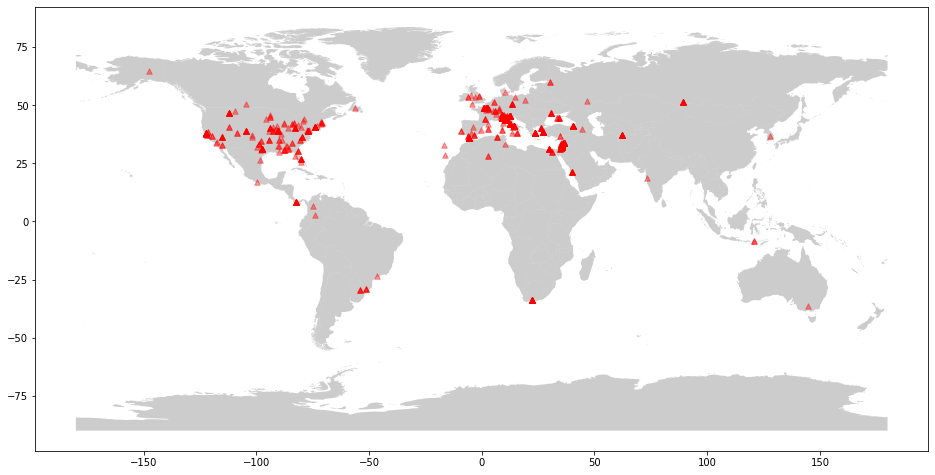

In [16]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

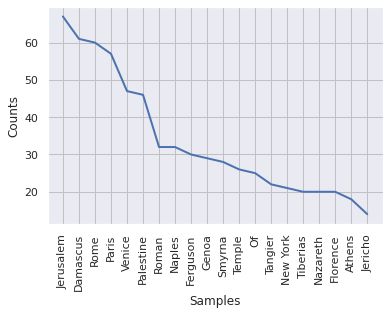

In [17]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

In [18]:
#import required libraries, packages, etc.
import folium
from folium import plugins
import json

In [ ]:

# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("TwainCities.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
TwainMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("TwainCities.geojson").add_to(TwainMap)

# Display your map   
TwainMap

In [ ]:
## Coding Challenge

from google.colab import files
uploaded = files.upload()

In [22]:
# Importing all libraries

import geopandas as gpd
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

import nltk
import seaborn as sns


In [30]:
def city_mapping(url):
  response = request.urlopen(url)                                               # Making request to get text
  raw = response.read().decode('utf8')
  places = GeoText(raw)                                                         # Identifying cities in the text
  citylists = list(places.cities)
  geolocator = Nominatim(user_agent='arpitashalini4@gmail.com', timeout=2)
  lat_lon = []
  for city in citylists:
    try:
      location = geolocator.geocode(city)
      if location:
        lat_lon.append(location)
    except GeocoderTimedOut as e:
      print("Error: geocode failed on input %s with message %s">
            (city, e))
  
  %matplotlib inline
  sns.set()

  
  freqdist1 = nltk.FreqDist(citylists)
  freqdist1.plot(20) 
  
  
  df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])

  geometry = [Point(x[1], x[0]) for x in df['Coordinates']]

  crs = {'init': 'epsg:4326'}
  geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

  countries_map = gpd.read_file('Countries_WGS84.shp') 
  
  f, ax = plt.subplots(figsize=(16, 16))
  countries_map.plot(ax=ax, alpha=0.3, color='grey')
  geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

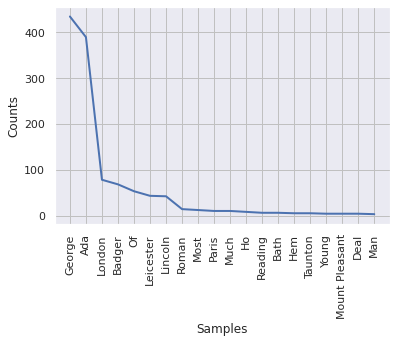

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


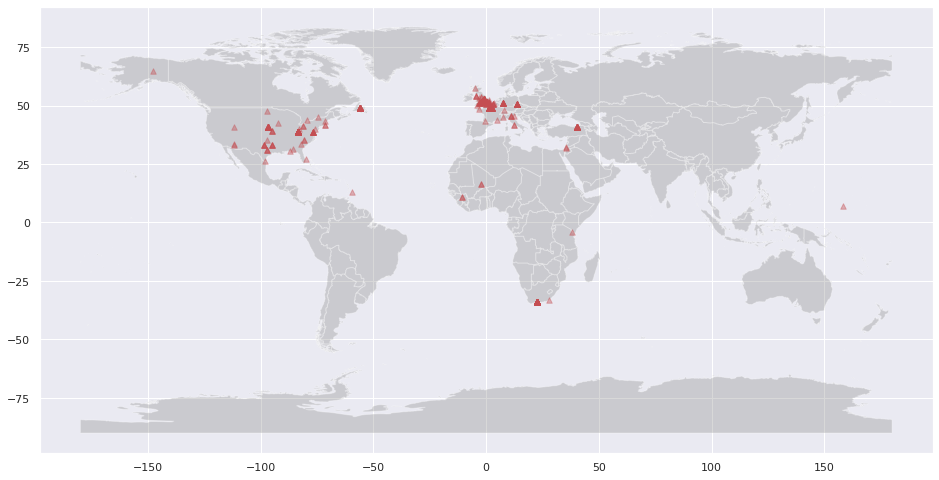

In [32]:
city_mapping('https://www.gutenberg.org/cache/epub/1023/pg1023.txt')            # Bleak House by Charles Dickens